In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np # For linear algebra
import pandas as pd # For reading in the data
from matplotlib import pyplot as plt # For showing the image

In [ ]:
def sigmoid(x): # The activation function. Range of the function is (0,1]
    return 1/(1 + np.exp(-x))
def sigmoid_prime(x): # The derivative of the activation function
    return sigmoid(x)*(1 - sigmoid(x))

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/train.csv')
data = np.array(data)
np.random.shuffle(data)

This neural network will have only one hidden layer. The input layer has 784 neurons, each corresponding to one pixel on the 28 by 28 grid of the image. The next layer is a hidden layer with 16 neurons. The last layer or the output layer has 10 neurons where each neuron corresponds to one of the 10 digits. It uses the sigmoid function as the activation function. So, the values on each neuron is always between 0 and 1.
#### Forward Propagation : 
$$Z^{[1]} = W^{[1]}A^{[0]} + b^{[1]}$$
$$A^{[1]} = \sigma(Z^{[1]})$$
$$Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$$
$$A^{[2]} = \sigma(Z^{[2]})$$
#### Backward Propagation :
$$dZ^{[2]} = 2\sigma^{'}(Z^{[2]})\cdot (A^{[2]} - Y)$$
$$dw^{[2]} = 2dZ^{[2]}A^{[1]T}$$
$$db^{[2]} = dZ^{[2]}$$
$$dZ^{[1]} = W^{[2]}dZ^{[2]}\cdot \sigma^{'}(Z^{[1]})$$
$$dW^{[1]} = 2dZ^{[1]}A^{[0]T}$$
$$db^{[1]} = dZ^{[1]}$$
#### Activation Function :
$$\sigma(x)  = \frac{1}{1 + e^{-x}}$$ 
$$\sigma^{'}(x) = \sigma(x)(1-\sigma(x))$$

In [ ]:
def init_params(): # Initializes the neural net with random weights and biases
    W1 = np.random.rand(16, 784) - 0.5
    b1 = np.random.rand(16, ) - 0.5
    b1 = b1.reshape(16, 1)
    W2 = np.random.rand(10, 16) - 0.5
    b2 = np.random.rand(10,) - 0.5
    b2 = b2.reshape(10, 1)
    return W1, b1, W2, b2

def norma0(arr): # Normalizes the value of each pixel from [0,255] to [0,1]
    a0 = arr[1:]/255
    a0 = a0.reshape(784,1)
    return arr[0], a0

def forward_prop(a0, W1, b1, W2, b2): # Calculates the activations of the neurons in successive layers
    Z1 = W1.dot(a0) + b1
    a1 = sigmoid(Z1)
    Z2 = W2.dot(a1) + b2
    a2 = sigmoid(Z2)
    return a1, a2, Z1, Z2

def correct_ans(label): # Generates the correct output layer where all neurons except the correct one are zeroes and the correct neuron has a value of 1
    ans = np.zeros(10,)
    ans[label] = 1
    ans = ans.reshape(10,1)
    return ans
 
def backprop(a0, a1, a2, z1, z2, W1, W2, b1, b2, Y): # Calculates the nudges required to reduce the cost function
    dz2 = 2*sigmoid_prime(z2)*(a2 - Y)
    dw2 = 2*dz2.dot(a1.T)
    db2 = dz2
    dz1 = (W2.T).dot(dz2) * sigmoid_prime(z1)
    dw1 = 2*dz1.dot(a0.T)
    db1 = dz1
    return dw1, db1, dw2, db2

def update_params(W1, W2, b1, b2, dw1, dw2, db1, db2, alpha): # Updates the parameters to minimize the cost function
    W1 = W1 - alpha*dw1
    W2 = W2 - alpha*dw2
    b1 = b1 - alpha*db1
    b2 = b2 - alpha*db2
    return W1, b1, W2, b2

def get_result(a2): # Get's the result based on the output layer
    a2 = a2.reshape(10,)
    m = a2[0]
    ans = 0
    for i in range(10):
        if m < a2[i]:
            ans = i
            m = a2[i]
    return ans

def prediction(a0, W1, b1, W2, b2): # Get's the model's prediction based on the input layer and the weights and biases
    a1, a2, Z1, Z2 = forward_prop(a0, W1, b1, W2, b2)
    return get_result(a2)

def draw_case(a0): # Draws out the input layer in a 28 by 28 grid using matplotlib
    a0 = a0.reshape(28,28)
    plt.imshow(a0, cmap = 'gray')

In [ ]:
train = data[1000:] # Training Data
test = data[0:1000] # Testing Data

In [ ]:
def gradient_descent(train, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        c = 0
        for j in range(train.shape[0]):
            label, a0 = norma0(train[j])
            a1, a2, Z1, Z2 = forward_prop(a0, W1, b1, W2, b2)
            Y = correct_ans(label)
            dw1, db1, dw2, db2 = backprop(a0, a1, a2, Z1, Z2, W1, W2, b1, b2, Y)
            W1, b1, W2, b2 = update_params(W1, W2, b1, b2, dw1, dw2, db1, db2, alpha)
            ans = get_result(a2)
            if ans == label:
                c += 1
        accuracy = c/train.shape[0]
        if i%10 == 0:
            print(f"Interation : {i}\nAccuracy : {accuracy}")
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(train, 0.1, 50)

Interation : 0
 Accuracy : 0.8763658536585366
Interation : 10
 Accuracy : 0.946560975609756
Interation : 20
 Accuracy : 0.9555853658536585
Interation : 30
 Accuracy : 0.9590731707317073
Interation : 40
 Accuracy : 0.962170731707317


~ 96.21 % accuracy on the training set

In [ ]:
count = 0
for k in range(test.shape[0]):
    label, a0 = norma0(test[k])
    ans = prediction(a0, W1, b1, W2, b2)
    if label == ans:
        count += 1
print(f"Accuracy : {count/test.shape[0]}")

Accuracy : 0.938


An accuracy of 93.8 % on the testing data set

Let's look at some of the predictions made by our model

Prediction : 3


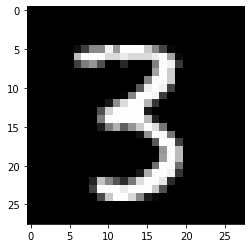

In [ ]:
label, a0 = norma0(test[89])
print(f"Prediction : {prediction(a0, W1, b1, W2, b2)}")
draw_case(a0)

Prediction : 9


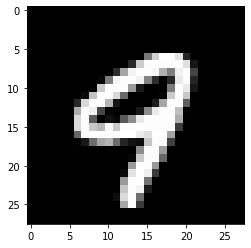

In [ ]:
label, a0 = norma0(test[125])
print(f"Prediction : {prediction(a0, W1, b1, W2, b2)}")
draw_case(a0)

Prediction : 5


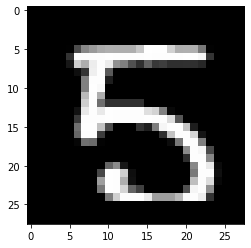

In [ ]:
label, a0 = norma0(test[255])
print(f"Prediction : {prediction(a0, W1, b1, W2, b2)}")
draw_case(a0)